#  Data Exploratory Data Analysis on Lending Club's Loan Applications

### What is Lending Club
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans. Lending Club is the world's largest peer-to-peer lending platform. The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015.

Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee. For more information click [here](https://en.wikipedia.org/wiki/Lending_Club)

Understanding of LendingClub Investment and Return can be found [here](https://www.youtube.com/watch?v=S8ti12Y3yqU). 

The data set hasbeen downloaded from [LendingClub](https://www.lendingclub.com/info/download-data.action) website. From the DataSet we are going to analyze how the 2017 Q2 lending club approved and rejected loans. As a Peer to Peer lending company Lending Club receives many applications however, not all getting approved due to poor risk score and other factors which makes loan deliquency. As part of this analysis I am going to explorer the one quarter data set to find insights on the various loans.

The Risk Score data set is using Vantage Score model. More information on vantage score range can be found [here](https://your.vantagescore.com/interpret_scores).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
#setting the max_columns options so that all the columns will be visible while displaying data frame.
pd.set_option('display.max_columns',150)
import warnings
warnings.filterwarnings('ignore')

## Loading and Understanding the Data.

Loading the Approved and Rejected loan csv files.

In [193]:
# Loading approved loans data set for 2017 Q2 from S3.
df_loanstats_2017_q2 = pd.read_csv('https://s3.amazonaws.com/stkaggle/lending_club/LoanStats_securev1_2017Q2_Full.csv')
# Loading reject loans data set for 2017 Q2 from S3.
df_rejectedstats_2017_q2 = pd.read_csv('https://s3.amazonaws.com/stkaggle/lending_club/RejectStats_2017Q2.csv')

Let's verify how many records loaded from accept data set and their dimensions.

In [3]:
print('Total records in 2017 Q2 funded loan dataset : {}'.format(len(df_loanstats_2017_q2)))
print('Total number of rows : {} and columns : {}'.format(len(df_loanstats_2017_q2.index),len(df_loanstats_2017_q2.columns)))
df_loanstats_2017_q2.head(3)

Total records in 2017 Q2 funded loan dataset : 105453
Total number of rows : 105453 and columns : 143


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,112158057,NaN,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,Project Lead,10+ years,MORTGAGE,113000.0,Source Verified,Jun-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,206xx,MD,21.43,0.0,Apr-1999,735.0,739.0,0.0,NaN,NaN,7.0,0.0,30569.0,62.9%,16.0,w,7125.15,7125.15,457.92,457.92,374.85,83.07,0.0,0.0,0.0,Sep-2017,232.79,Oct-2017,Sep-2017,734.0,730.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,356811.0,0.0,3.0,1.0,4.0,12.0,60352.0,78.0,0.0,1.0,25792.0,75.0,42600.0,1.0,4.0,0.0,5.0,50973.0,9208.0,NaN,0.0,0.0,114.0,218.0,14.0,12.0,4.0,218.0,NaN,14.0,NaN,0.0,1.0,3.0,1.0,1.0,9.0,3.0,3.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,417686.0,90921.0,35000.0,92511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111735948,NaN,6000.0,6000.0,6000.0,36 months,7.35%,186.23,A,A4,VP of Professional Services,2 years,MORTGAGE,74000.0,Not Verified,Jun-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,461xx,IN,19.02,0.0,Feb-2004,735.0,739.0,0.0,NaN,NaN,15.0,0.0,5433.0,14.8%,35.0,w,5700.12,5700.12,366.34,366.34,299.88,66.46,0.0,0.0,0.0,Sep-2017,186.23,Oct-2017,Sep-2017,789.0,785.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,297932.0,1.0,7.0,2.0,3.0,6.0,57864.0,88.0,1.0,5.0,3201.0,62.0,36800.0,4.0,2.0,4.0,9.0,19862.0,1927.0,73.6,0.0,0.0,81.0,160.0,9.0,6.0,1.0,15.0,NaN,6.0,NaN,0.0,2.0,3.0,2.0,12.0,11.0,7.0,23.0,3.0,15.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,342624.0,63297.0,7300.0,65959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112438798,NaN,4000.0,4000.0,4000.0,36 months,5.32%,120.46,

Now verify the how many records loaded from rejected data set along with their dimensions.

In [4]:
print('Total records in 2017 Q2 rejected loan dataset  : {}'.format(len(df_rejectedstats_2017_q2)))
print('Total number of rows : {} and columns : {}'.format(len(df_rejectedstats_2017_q2.index),len(df_rejectedstats_2017_q2.columns)))
df_rejectedstats_2017_q2.head(3)

Total records in 2017 Q2 rejected loan dataset  : 447235
Total number of rows : 447235 and columns : 9


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,13650.0,2017-04-01,Debt consolidation,799.0,19.98%,616xx,IL,< 1 year,0
1,10000.0,2017-04-01,debt_consolidation,NaN,23.09%,234xx,VA,< 1 year,0
2,40000.0,2017-04-01,debt_consolidation,NaN,8.83%,759xx,TX,< 1 year,0


Seems the dataset is rich from volume perspective. The Loanstats data set has ~50k records. The Rejcted loan data set has ~44k. Only 50% of the data has been taken here due to volume concerns. Let's explorer the data: ask questions and try to find answers.

## Describe the Data

The Loan Status CSV (LoanStats_securev1_2017Q2.csv) contains 143 columns however as part of this analysis we will use only few. The columns which are going to be used in the analysis has been described below. Similarly the rejected loan CSV (RejectStats_2017Q2.csv) has total 9 columns, the columns which are used on analysis has been described below:

Column descriptions for df_loanstats_2017_q2:

    1. funded_amnt : The total amount committed to that loan at that point in time.
    2. loan_amnt :	The listed amount of the loan applied for by the borrower. If at some point in time, the credit  department reduces the loan amount, then it will be reflected in this value.
    3. int_rate	: Interest Rate on the loan.
    4. addr_state :	The state provided by the borrower in the loan application.
    5. total_acc : The total number of credit lines currently in the borrower's credit file.
    6. open_acc	The number of open credit lines in the borrower's credit file.
    7. purpose : A category provided by the borrower for the loan request.
    8. tot_cur_bal : Total current balance of all accounts.
    9. fico_range_low : The lower boundary range the borrower’s FICO at loan origination belongs to.
    10: fico_range_high : The upper boundary range the borrower’s FICO at loan origination belongs to.
    11: pub_rec_bankruptcies : Number of public record bankruptcies

Column descriptions for df_rejectedstats_2017_q2:
    1. Risk_Score :	For applications prior to November 5, 2013 the risk score is the borrower's FICO score. For applications after November 5, 2013 the risk score is the borrower's Vantage score.
    2. Debt-To-Income Ratio : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
    3. Employment Length :	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

## Summary Statistics on key data items

1. Funded amount mean, mediam and max in 2017 Q2?
2. What are the different purposes loans are getting issues?
3. On the rejected loan applications what's the min and max risk score?

In [5]:
print('Funded amount median {0:15.0f}'.format(df_loanstats_2017_q2['funded_amnt'].median()))
print('Funded amount mean   {0:15.0f}'.format(df_loanstats_2017_q2['funded_amnt'].mean()))
print('Funded amount max    {0:15.0f}'.format(df_loanstats_2017_q2['funded_amnt'].max()))

print('\nTotal type of loan purpose:\n',df_loanstats_2017_q2['purpose'].value_counts())


print('\nRejected loan risk score(aka vantage score) low:{:.0f} , high:{:.0f}'.format(df_rejectedstats_2017_q2['Risk_Score'].min(),
                                                   df_rejectedstats_2017_q2['Risk_Score'].max()))

Funded amount median           12000
Funded amount mean             14589
Funded amount max              40000

Total type of loan purpose:
 debt_consolidation    58557
credit_card           21261
home_improvement       9222
other                  7140
major_purchase         2616
medical                1648
car                    1334
vacation               1170
small_business         1034
moving                  945
house                   453
renewable_energy         70
wedding                   1
Name: purpose, dtype: int64

Rejected loan risk score(aka vantage score) low:300 , high:990


## Analytical Questions

## Q1: What's the average borrowing amount among the approved loans?

Mean: 14589, Standard Deviation : 9478


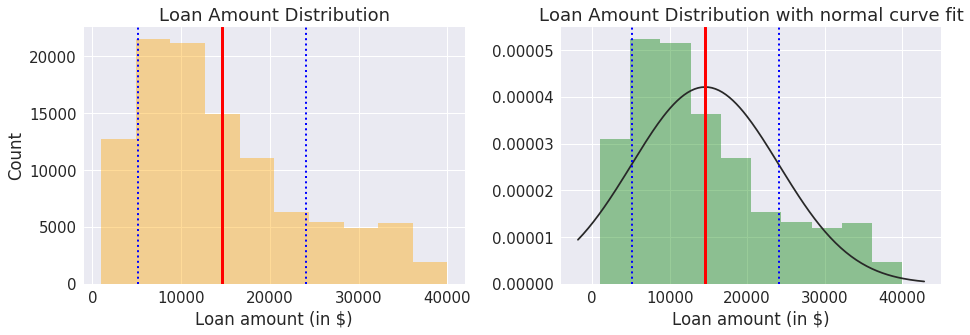

In [6]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
f,axes = plt.subplots(1,2,figsize=(14,5))
ax1 = sns.distplot(df_loanstats_2017_q2['funded_amnt'].dropna(), color='orange', 
                  kde=False,bins=10,ax=axes[0])
funded_amt_mean = df_loanstats_2017_q2['funded_amnt'].mean()
funded_amt_std = df_loanstats_2017_q2['funded_amnt'].std()
ax1.axvline(funded_amt_mean,lw=3,color='r')
ax1.axvline(funded_amt_mean + funded_amt_std, color='b',lw=2,linestyle='dotted')
ax1.axvline(funded_amt_mean - funded_amt_std, color='b',lw=2, linestyle='dotted')
ax1.set_xlabel('Loan amount (in $)')
ax1.set_ylabel('Count')
ax1.set_title('Loan Amount Distribution')
ax1 = sns.distplot(df_loanstats_2017_q2['funded_amnt'].dropna(), color='green', 
                  kde=False,fit=stats.norm,bins=10,ax=axes[1])
funded_amt_mean = df_loanstats_2017_q2['funded_amnt'].mean()
funded_amt_std = df_loanstats_2017_q2['funded_amnt'].std()
ax1.axvline(funded_amt_mean,lw=3,color='r')
ax1.axvline(funded_amt_mean + funded_amt_std, color='b',lw=2,linestyle='dotted')
ax1.axvline(funded_amt_mean - funded_amt_std, color='b',lw=2, linestyle='dotted')
ax1.set_xlabel('Loan amount (in $)')
ax1.set_title('Loan Amount Distribution with normal curve fit')
plt.tight_layout()
print('Mean: {}, Standard Deviation : {}'.format(int(funded_amt_mean),int(funded_amt_std)))

What we are seeing is that most of the borrowers are applying loan between \$5,000 and \$20,000. The mean loan amount is around \$15,000. There maximum loan which Lending Club gives is \$40,000 as there is no loan beyond \$40,000.

## Q2 : What's the interest rates across different loan grades from A through G.

Below is the different loan grades (from A thru G) on Lending Club. The higher the grade, the higer is risk on return,conversely the lower the grade the lower the return & less risk. Let's find out if our data set says the same or not? 

*Note: The below image is from Lending Club & used only for illustration purpose.*

![Loan Grades](https://s3.amazonaws.com/stkaggle/lending_club/Lending-Club-risk.png)



Text(0.5,1,'Interest Rate on Different Loan Grades')

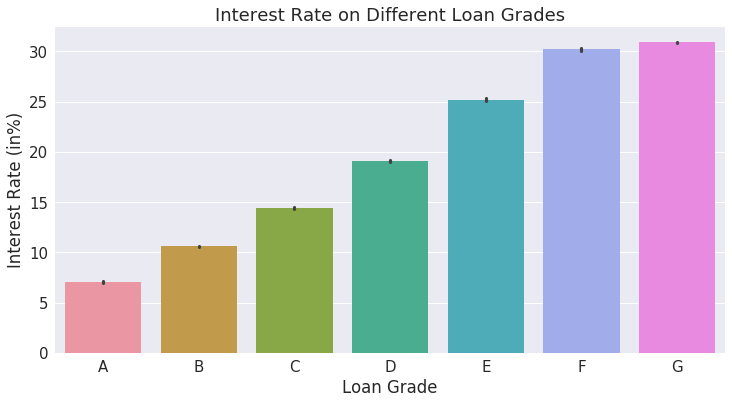

In [100]:
#Adding a new column for numeric interest rate calculation as the current int_rate is not a numeric column
df_loanstats_2017_q2['int_rate_num']=df_loanstats_2017_q2['int_rate'].apply(lambda val:float(str(val).split('%')[0]))
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(x='grade',y='int_rate_num',data=df_loanstats_2017_q2,order=['A','B','C','D','E','F','G'],saturation=0.75)
sns.set(font_scale=1.5)
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (in%)')
plt.title('Interest Rate on Different Loan Grades')

What we are seeing above from the plot is what we anticipated. The lowest interest rate is on Loan Grade A which is   < 10% and the highest interest is on loan grade G which is > 30%. The interest rate grows gradually from loan grade A thru G along with Risk and Reward.

### Q3:What's the different types of loan borrowers are applying loan from Lending Club? and What's the range of those loans?

[Text(0,0,'debt_consolidation'),
 Text(0,0,'home_improvement'),
 Text(0,0,'major_purchase'),
 Text(0,0,'credit_card'),
 Text(0,0,'medical'),
 Text(0,0,'vacation'),
 Text(0,0,'other'),
 Text(0,0,'house'),
 Text(0,0,'car'),
 Text(0,0,'small_business'),
 Text(0,0,'moving'),
 Text(0,0,'renewable_energy'),
 Text(0,0,'wedding')]

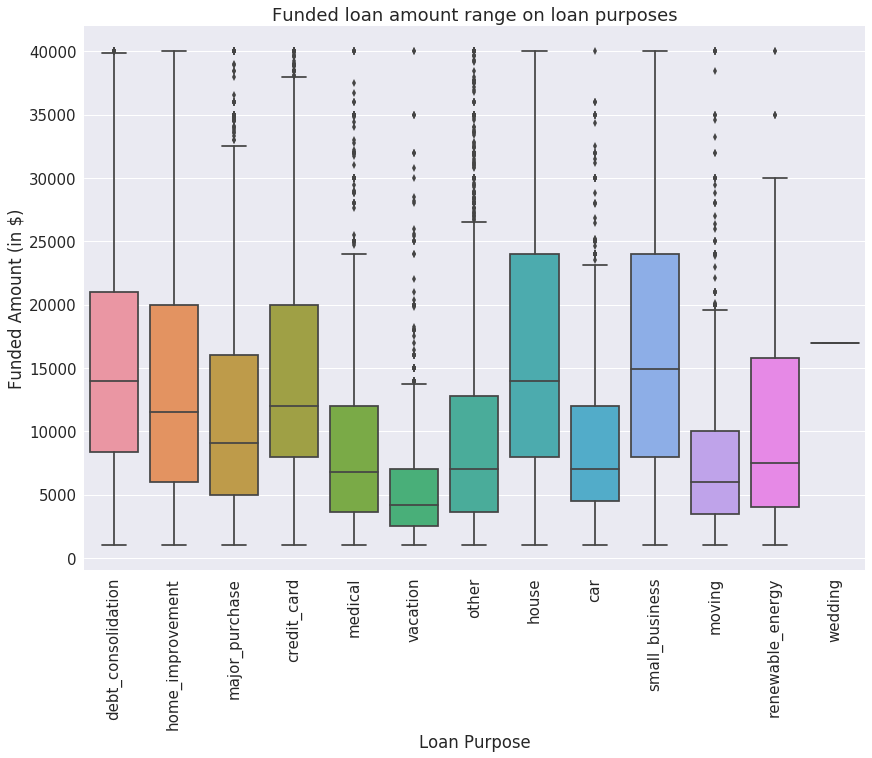

In [8]:
plt.figure(figsize=(14,10))
sns.set(font_scale=1.5)
ax = sns.boxplot(x='purpose',y='funded_amnt',data=df_loanstats_2017_q2)
plt.xlabel('Loan Purpose')
plt.ylabel('Funded Amount (in $)')
plt.title('Funded loan amount range on loan purposes')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

What we are seeing here is thatt, from all different loan applications the median amount is < \$15,000. The maximum loan amount is \$40,000. Median loan for vacation is less than \$5,000, however in vacation purpose there are many outliers including upper range from \$30,000 to \$40,000.

## Q4: Lending Club loan approval rate is low so, there are lot of loans gets rejected. What could be the reason?

Here we are investigating whether employment length of rejected loan vs approval loan makes a difference or not, as this feature is common on both approved and rejected data set.


Text(0.5,1,'Application approval/reject count vs Employment Length')

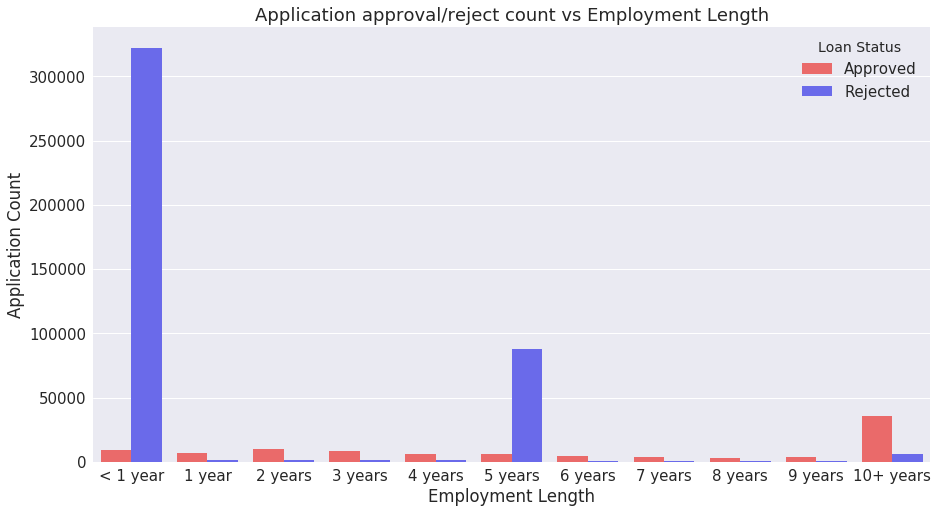

In [9]:
# Rename column 'emp_length' to 'Employment Length in approved loan data set (df_loanstats_2017_q2)
df_loanstats_2017_q2.rename_axis({'emp_length':'Employment Length'},axis='columns',inplace=True)
df_loanstats_2017_q2.head()
df_rejectedstats_2017_q2.head()
# Add a new column 'Loan Status' to identify which DataFrame is Approved or Rejected after merging both the 
# df_loanstats_2017_q2 & df_rejectedstats_2017_q2
df_loanstats_2017_q2['Loan Status'] = 'Approved'
df_rejectedstats_2017_q2['Loan Status'] = 'Rejected'
# Create a new combined DataFrame of both Approved and Rejected loans Data Sets two columns for comparision.
combined_df_list = [df_loanstats_2017_q2[['Employment Length','Loan Status']], df_rejectedstats_2017_q2[['Employment Length','Loan Status']]]
# Concating
df_loan_status_app_rej = pd.concat(combined_df_list)
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
ax = sns.countplot(data=df_loan_status_app_rej,x='Employment Length',hue='Loan Status',palette='seismic_r'
                   ,order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years',
                           '7 years','8 years','9 years','10+ years'])
ax.set_xlabel('Employment Length')
ax.set_ylabel('Application Count')
ax.set_title('Application approval/reject count vs Employment Length')

What we are seeing is that the highest loan decine is due to less number of years in employment, where Length of Employment is < 1 year. On contrast, >10 years employment length has a good approval count. In banking loan or credit card or any kind of financial credit the Length of Employment is a critical factor to approve any kind of loan because that the income source of the borrower. If the length is less then income is less, so for banker it's a risk to provide the loan.

## Q5: Does the loan interest rate changes based on borrower's FICO score?

In the Approved loan Data Set we are seeing 'fico_range_low' and 'fico_range_high'. Is low or high FICO score impact the loan interest rate? 

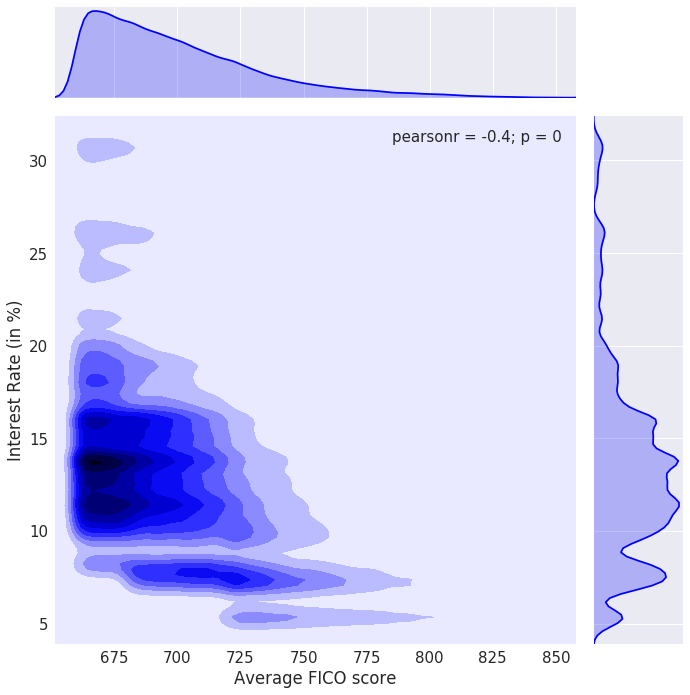

In [10]:
#axis = plt.subplots(1,1,figsize=(12,8))
#Calculating the average score between FICO low and high to get a single score in the middle
df_loanstats_2017_q2['Average Fico Score'] = (df_loanstats_2017_q2['fico_range_low']+df_loanstats_2017_q2['fico_range_high'])/2
g = sns.jointplot(data=df_loanstats_2017_q2,x='Average Fico Score',y='int_rate_num',kind='kde',size=10,color='b')
g.set_axis_labels('Average FICO score','Interest Rate (in %)')

What we are oberving is that most of the approved borrower's average FICO score with in the range of 675 to 700. When the score goes high (> 750) we are seeing reduction in interest rate. The highest interest rate (between 25% to 30%) happens around the score 675 which means there could be some other parameter for which these borrowers are paying such high interest rate.

## Q6: From rejected loans - what are the different purposes borrowers are applying for the loan?

Lets verify what are the different 'Loan Titles' categories exists.

In [11]:
df_rejectedstats_2017_q2 = df_rejectedstats_2017_q2.dropna()
df_rejectedstats_2017_q2['Loan Title'].dropna().value_counts()

Debt consolidation         87048
Credit card refinancing    20000
Other                      17438
Car financing              11020
Home improvement            9585
Medical expenses            5470
Major purchase              4597
Moving and relocation       4460
Business                    3948
other                       2643
Vacation                    2306
Home buying                 2275
debt_consolidation          1510
car                          864
moving                       617
Green loan                   531
home_improvement             480
major_purchase               410
medical                      321
small_business               310
house                        235
credit_card                  234
vacation                     226
renewable_energy              33
Name: Loan Title, dtype: int64

Looks like in the data set we have few duplicates like debt_consolidation and Debt consolidation, credit_card and Credit card refinancing, vacation and Vacation etc.. Lets update those to make sure we are only unique titles.

In [12]:
df_rejectedstats_2017_q2.replace({'debt_consolidation':'Debt consolidation',
                                  'credit_card':'Credit card refinancing',
                                  'home_improvement':'Home improvement','medical':'Medical expenses',
                                 'vacation':'Vacation', 'Business':'Business Loan',
                                 'renewable_energy':'Green loan','house':'Home buying','other':'Other'},inplace=True)

Text(0.5,1,'Amount Requested vs Loan Title')

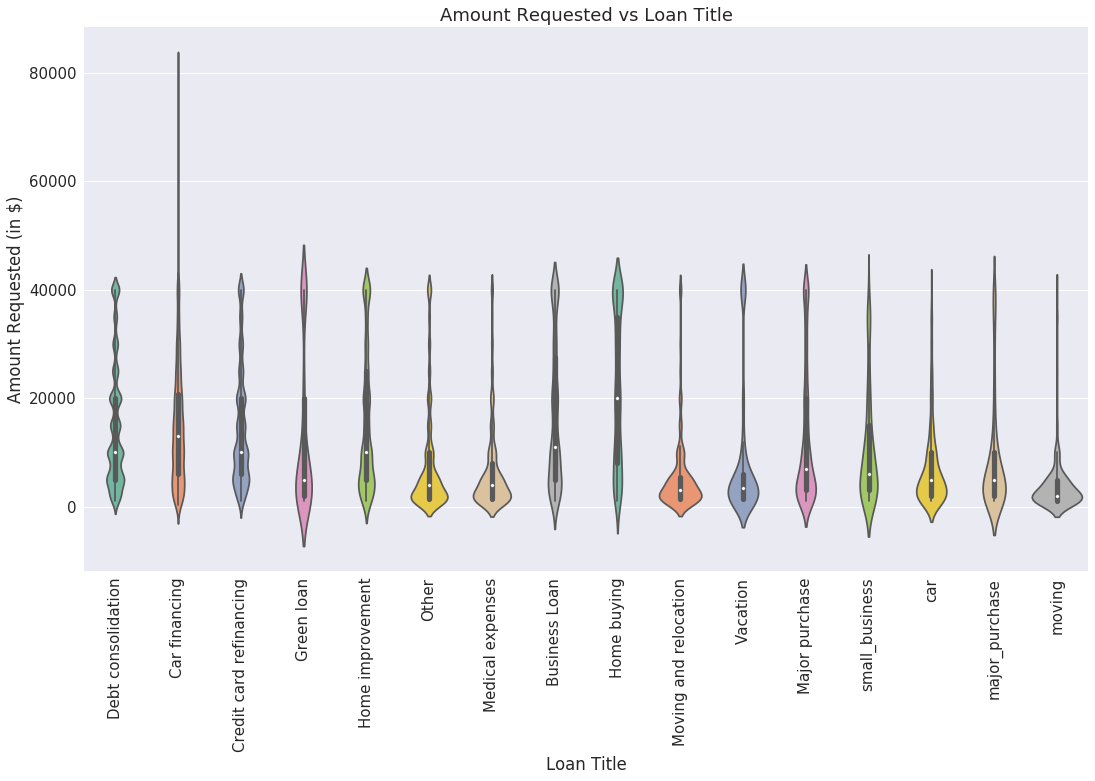

In [13]:
sns.set()
sns.set(font_scale=1.5)
plt.figure(figsize=(18,10))
ax = sns.violinplot(data=df_rejectedstats_2017_q2,x='Loan Title',y='Amount Requested',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Loan Title')
ax.set_ylabel('Amount Requested (in $)')
ax.set_title('Amount Requested vs Loan Title')

It looks like most of the Loan Title is \$40,000 range which is same as approved loans; except for Car refinancing where loan amount is applied beyond \$80,000 which could be the rejection reason. The median of all different loan types is < \$20,000.

## Q7: Which state is getting approved with highest number of loans and which state is lowest?

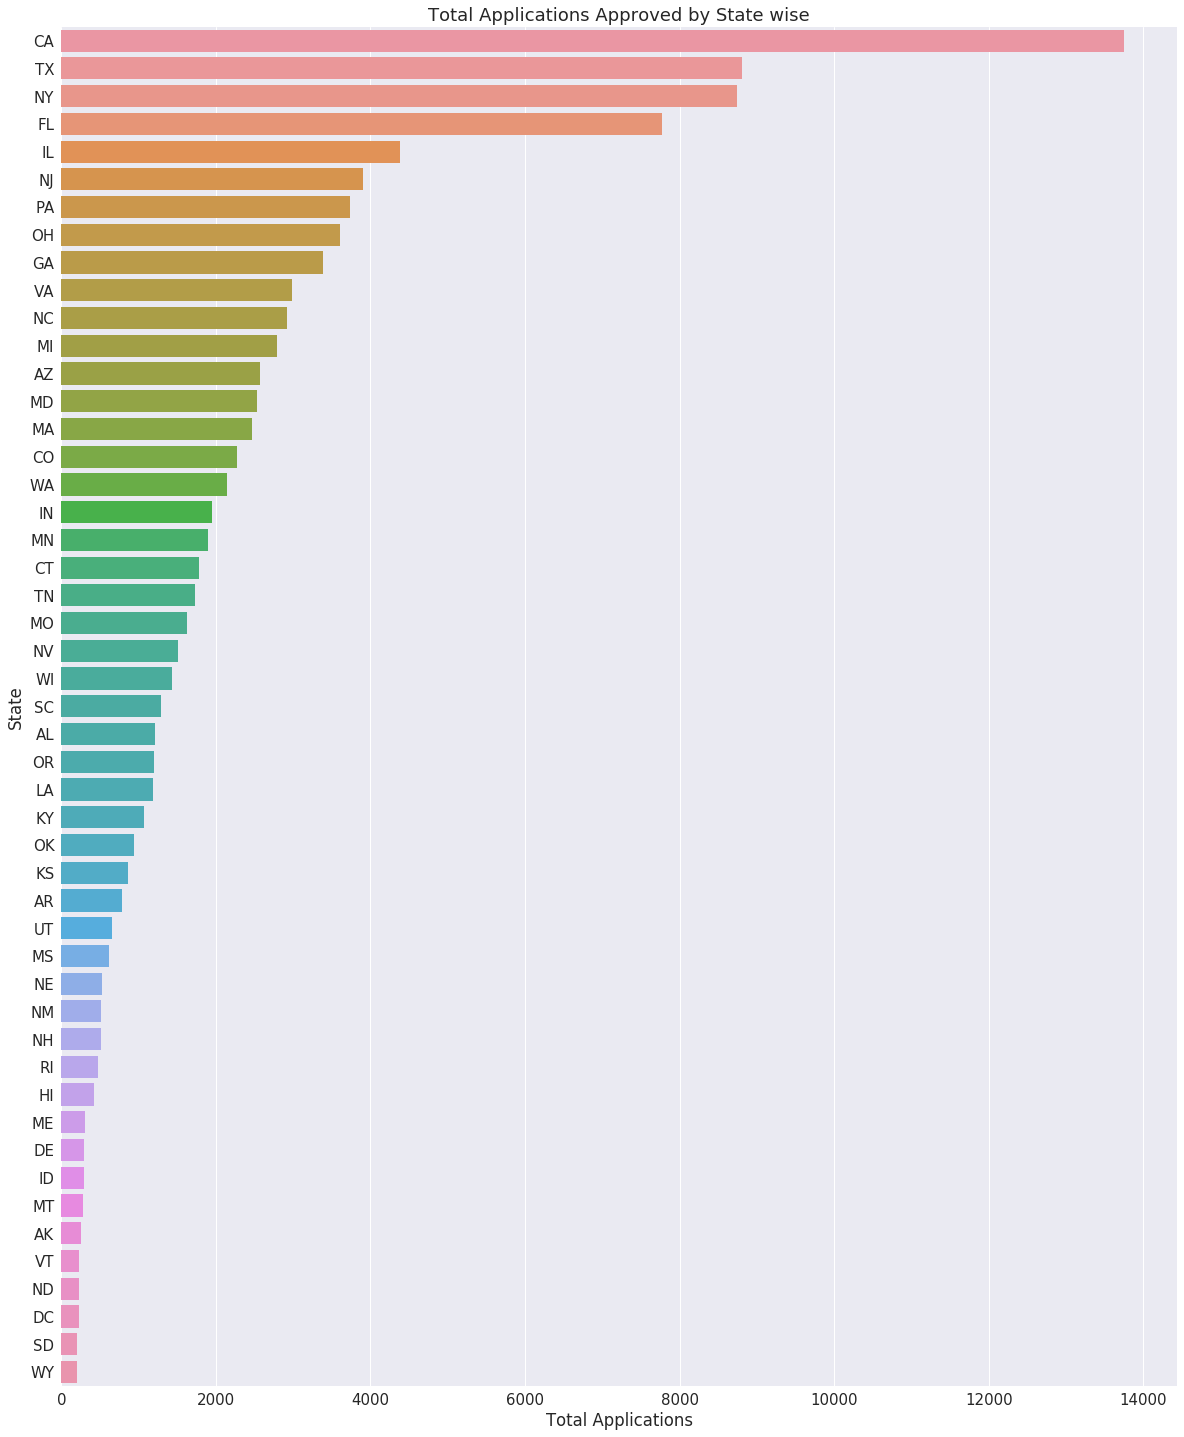

In [88]:
plt.figure(figsize=(20,25))
ax = sns.countplot(data=df_loanstats_2017_q2,y='addr_state',order=df_loanstats_2017_q2['addr_state'].value_counts().index)
ax.set_xlabel('Total Applications')
ax.set_ylabel('State')
ax.set_title('Total Applications Approved by State wise')
plt.show()

It looks like more loans (near to 14000) are approved from California which makes sense because the total population of CA is over 39 millions. The lowest is from Wyoming state where population is 585k which is a small state by population.

## Q8: What are the lending term Lending Club offers to customers? Does the average interest rate gets vary across different terms?

Here we are taking the Approved loan data set and calculating Min, Average and Max interest rate by their loan term. Let's visualize the details after deriving from descriptive statistics.

Min Interest Rate: 
  term
 36 months    5.32
 60 months    7.97
Name: int_rate_num, dtype: float64
-----------
Average Interest Rate: 
  term
 36 months    12.210617
 60 months    15.499452
Name: int_rate_num, dtype: float64
-----------
Max Interest Rate: 
  term
 36 months    30.99
 60 months    30.99
Name: int_rate_num, dtype: float64


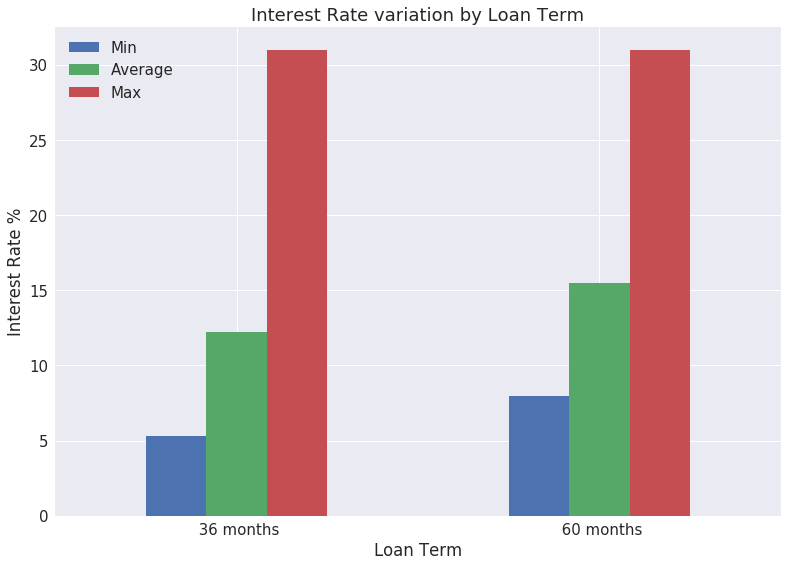

In [101]:
def interest_rate_by_loan_term():
    print('Min Interest Rate: \n ',df_loanstats_2017_q2.groupby('term')['int_rate_num'].min())
    print('-----------')
    print('Average Interest Rate: \n ',df_loanstats_2017_q2.groupby('term')['int_rate_num'].mean())
    print('-----------')
    print('Max Interest Rate: \n ',df_loanstats_2017_q2.groupby('term')['int_rate_num'].max())

    # Creating a new DataFrame by grouping by 'term', by interest rates of three different type - min, average and max.
    term_int_rate_df = df_loanstats_2017_q2.groupby('term')['int_rate_num'].agg({'Min':np.min,'Average':np.mean,'Max':np.max})
    ax = term_int_rate_df.plot.bar(title='Interest Rate variation by Loan Term',figsize=(13,9),mark_right=True,rot=0)
    ax.set_xlabel('Loan Term')
    ax.set_ylabel('Interest Rate %')
interest_rate_by_loan_term()

It seems Lending Club offers loans only in two terms, which is 3 and 5 years. The minimum interest rate on these terms is varing by 2% however maximum is same. However we are seeing on average there is a 4% difference in the average interest rate in these two terms, which concludes the borrowers for 5 years loan is paying more than 3 years loan on average. 

## Q9: How many public bankruptcies record(s) has approved borrwer has?

Lets findout different buckets of public bankruptcies count of aproved loans.

In [256]:
df = df_loanstats_2017_q2['pub_rec_bankruptcies'].value_counts()
df.index = ['No Record','1 record','2 records','3 records','4 records','5 records','6 records','7 records']
df

No Record    91814
1 record     12702
2 records      724
3 records      150
4 records       39
5 records       13
6 records        6
7 records        3
Name: pub_rec_bankruptcies, dtype: int64

It seems there are borrowers which had upto 7 bankruptcies record, but most of the borrowers are in good standing. Lets see the numbers visually on the percent.

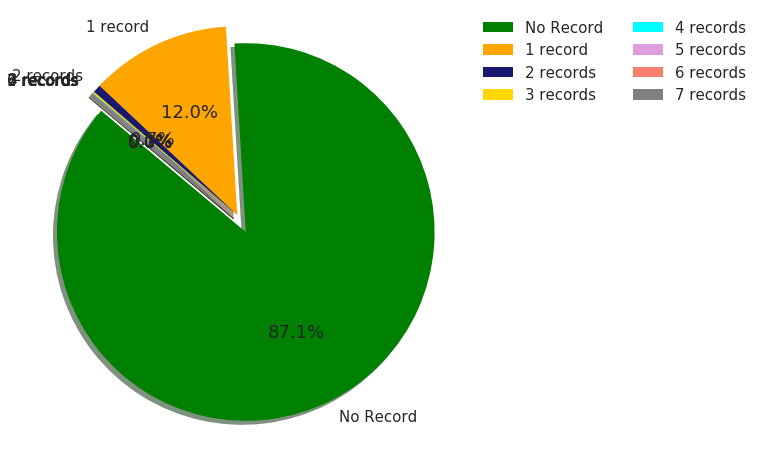

Wedge(center=(0, 0), r=1, theta1=496.808, theta2=499.28, width=None)
Text(-0.818022,0.735418,'2 records')
Text(-0.446194,0.401137,'0.7%')


In [259]:
bankruptcies_df = df_loanstats_2017_q2['pub_rec_bankruptcies'].value_counts()
plt.figure(figsize=(8,8))
ax = plt.pie(df,shadow=True,startangle=140,explode=(0.1,0,0,0,0,0,0,0),labels=df.index,autopct='%1.1f%%'
             ,colors=['green','orange','midnightblue','gold','cyan','plum','salmon','grey'])
plt.axis('equal')
plt.legend(loc='best',bbox_to_anchor=[1,1],ncol=2)
plt.show()
bankruptcies_df
for i in ax:
    print(i[2])

It seems 87% loan applicants are in good standing and no public record, there is 12% borrower has 1 record. There are 3 applicants with 7 public bankruptcies record which is surprising !!

# Future Research

## References

Data Set has been taken from - https://www.lendingclub.com/info/download-data.action

Image for different note types with corresponding interest rate is referred from : 
[Note and Interest Rate Image](https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdn.moneycrashers.com%2Fwp-content%2Fuploads%2F2015%2F04%2Freward-risk.png&imgrefurl=https%3A%2F%2Fwww.moneycrashers.com%2Flending-club-review-peer-to-peer-lending%2F&docid=DfLO8BN0Sc-YuM&tbnid=a7zLpApSpYMOyM%3A&vet=10ahUKEwjuhqGn4a_XAhUQ2WMKHYnWCiMQMwgmKAAwAA..i&w=509&h=271&bih=746&biw=1536&q=Lending-Club-risk.png&ved=0ahUKEwjuhqGn4a_XAhUQ2WMKHYnWCiMQMwgmKAAwAA&iact=mrc&uact=8)

About Lending Club Description is referred from [Lending Club Wiki Site](https://en.wikipedia.org/wiki/Lending_Club)